In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-social-network-profile-clustering/03_Clustering_Marketing.csv


In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [65]:
data = pd.read_csv(r"/kaggle/input/students-social-network-profile-clustering/03_Clustering_Marketing.csv")

In [66]:
data

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2007,NaN,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2007,F,17.41,49,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,2007,F,17.511,41,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
3,2006,F,NaN,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2008,F,16.657,1,0,0,0,0,0,1,...,0,0,0,3,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2008,F,16.329,21,0,0,0,0,0,0,...,0,0,0,2,0,0,0,1,0,0
14996,2008,F,16.545,50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14997,2007,F,17.999,32,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14998,2007,F,17.903,20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   gradyear         15000 non-null  int64 
 1   gender           13663 non-null  object
 2   age              12504 non-null  object
 3   NumberOffriends  15000 non-null  int64 
 4   basketball       15000 non-null  int64 
 5   football         15000 non-null  int64 
 6   soccer           15000 non-null  int64 
 7   softball         15000 non-null  int64 
 8   volleyball       15000 non-null  int64 
 9   swimming         15000 non-null  int64 
 10  cheerleading     15000 non-null  int64 
 11  baseball         15000 non-null  int64 
 12  tennis           15000 non-null  int64 
 13  sports           15000 non-null  int64 
 14  cute             15000 non-null  int64 
 15  sex              15000 non-null  int64 
 16  sexy             15000 non-null  int64 
 17  hot              15000 non-null

In [68]:
data.columns

Index(['gradyear', 'gender', 'age', 'NumberOffriends', 'basketball',
       'football', 'soccer', 'softball', 'volleyball', 'swimming',
       'cheerleading', 'baseball', 'tennis', 'sports', 'cute', 'sex', 'sexy',
       'hot', 'kissed', 'dance', 'band', 'marching', 'music', 'rock', 'god',
       'church', 'jesus', 'bible', 'hair', 'dress', 'blonde', 'mall',
       'shopping', 'clothes', 'hollister', 'abercrombie', 'die', 'death',
       'drunk', 'drugs'],
      dtype='object')

In [69]:
data['gender'].value_counts()

gender
F    11057
M     2606
Name: count, dtype: int64

<Axes: xlabel='gender', ylabel='count'>

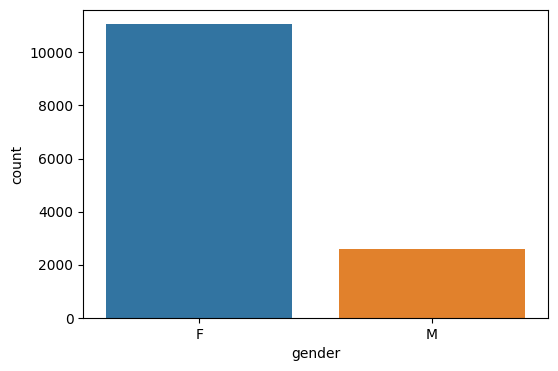

In [70]:
plt.figure(figsize = (6,4))
sn.countplot(x = "gender" , data = data)

/tmp/ipykernel_33/2078029463.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize = (8,6))


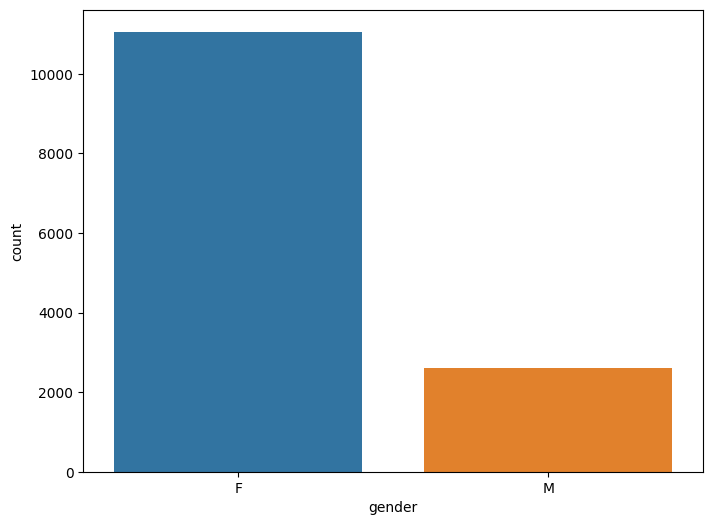

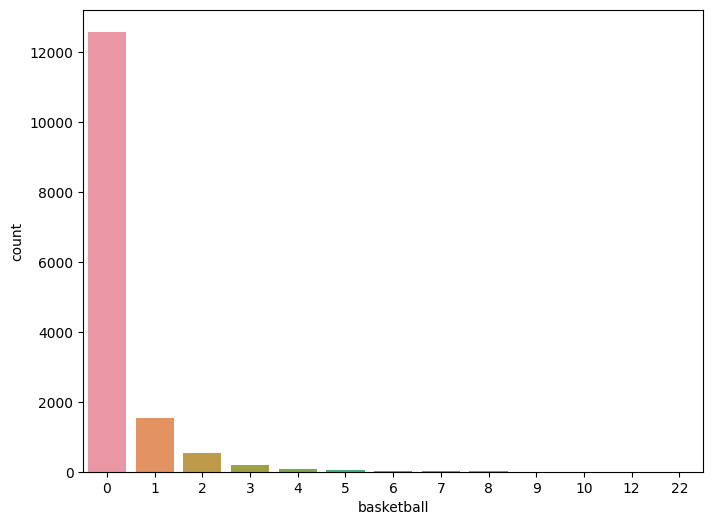

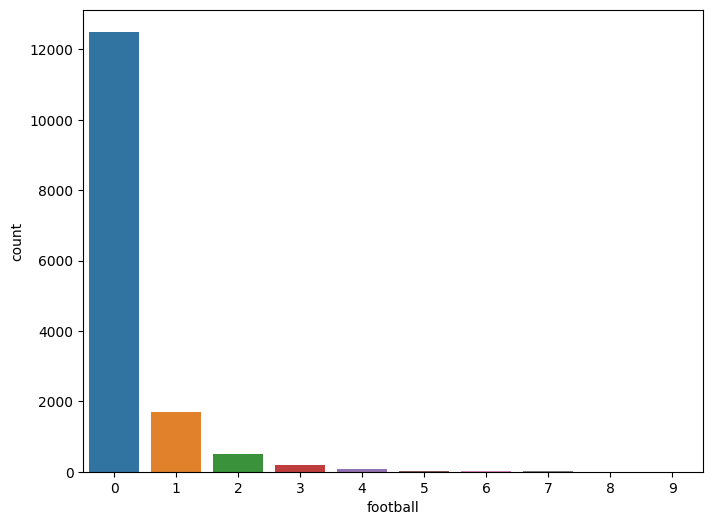

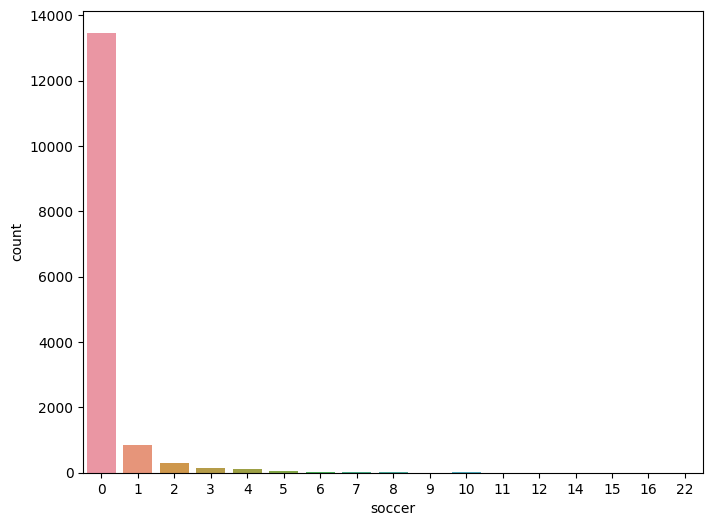

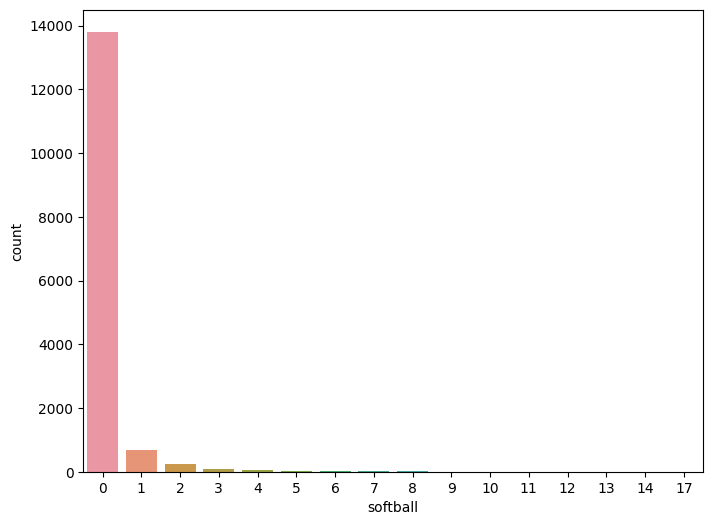

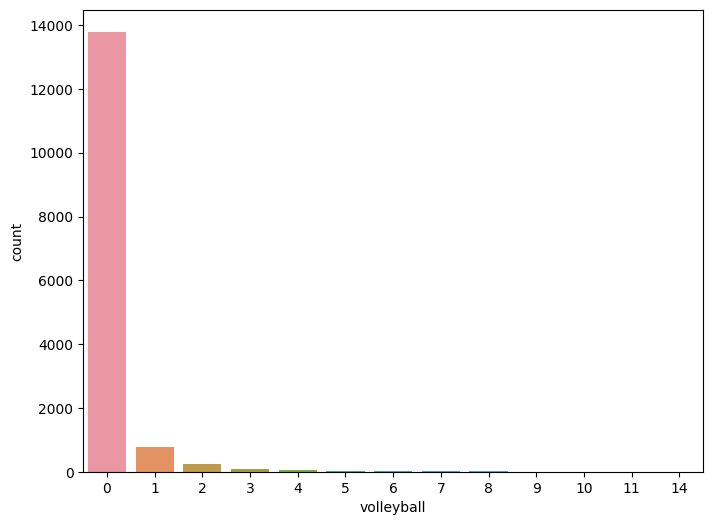

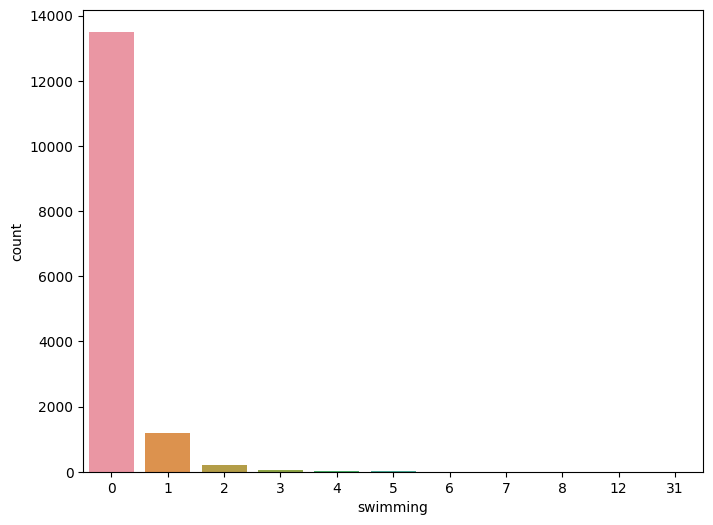

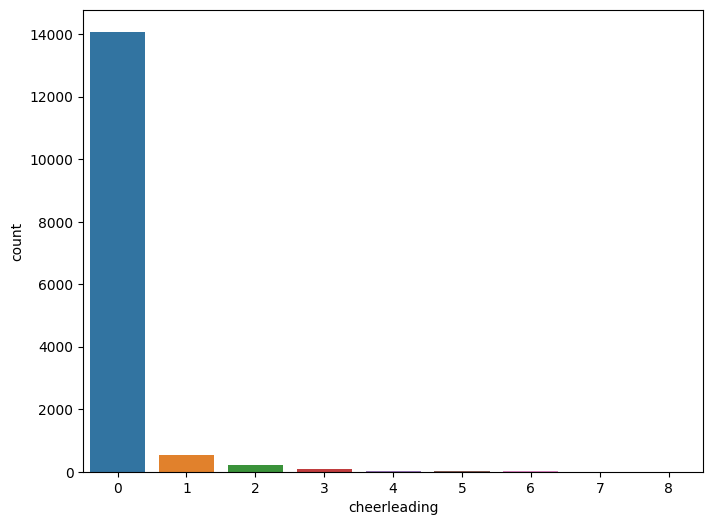

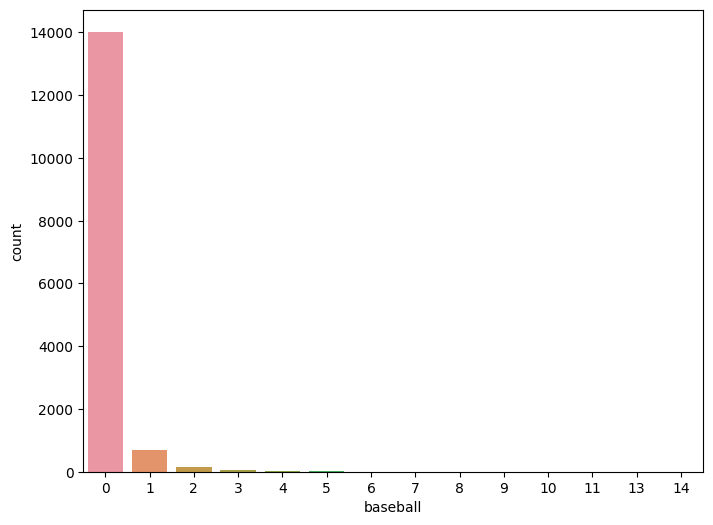

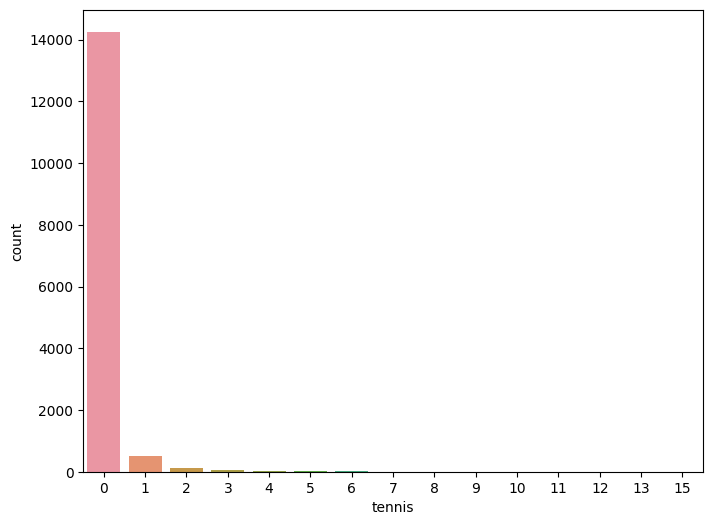

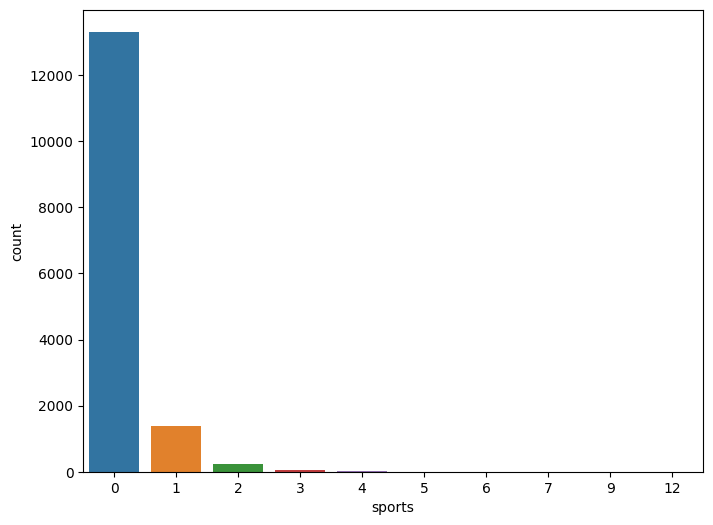

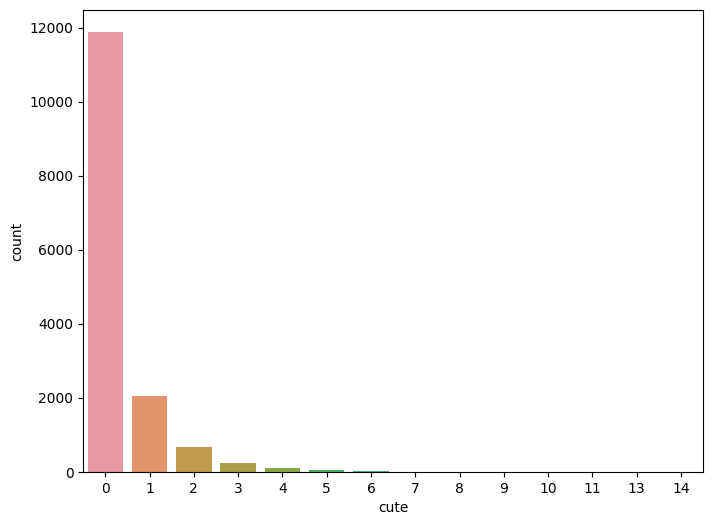

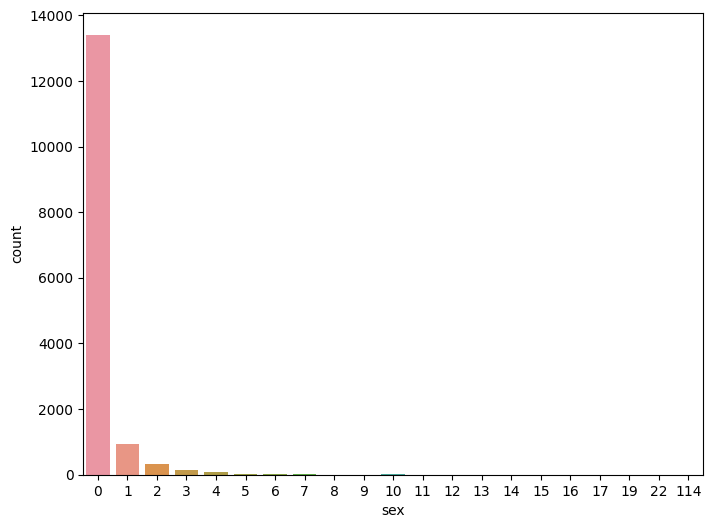

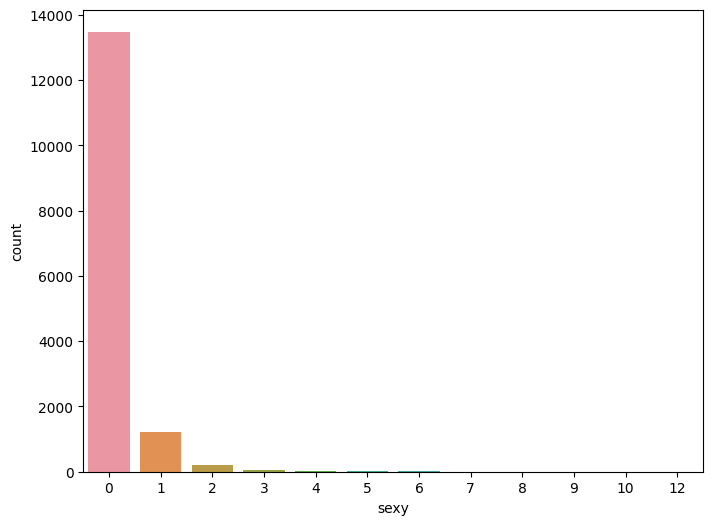

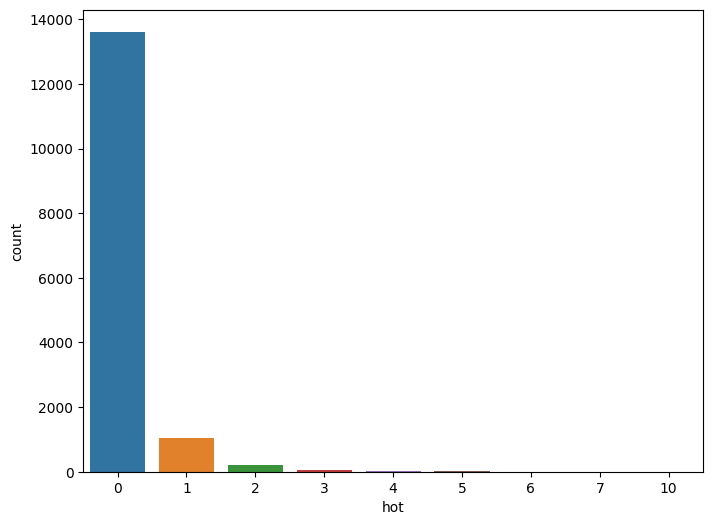

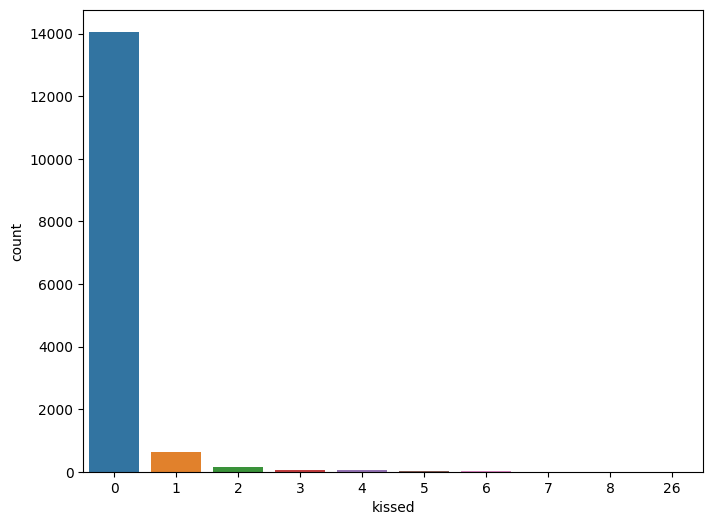

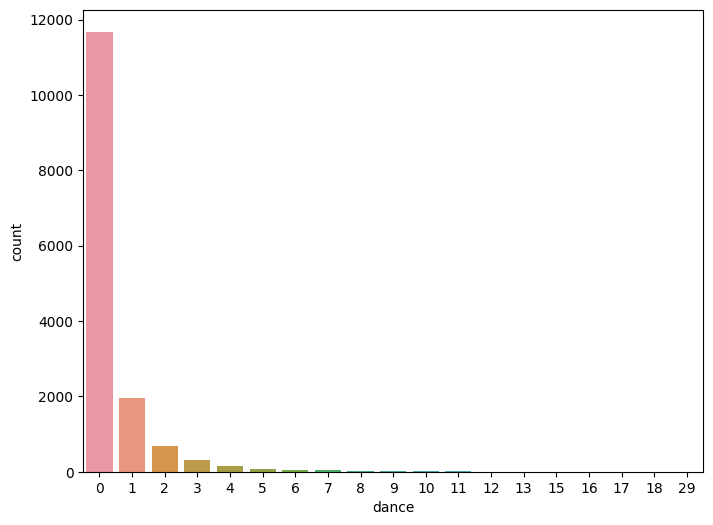

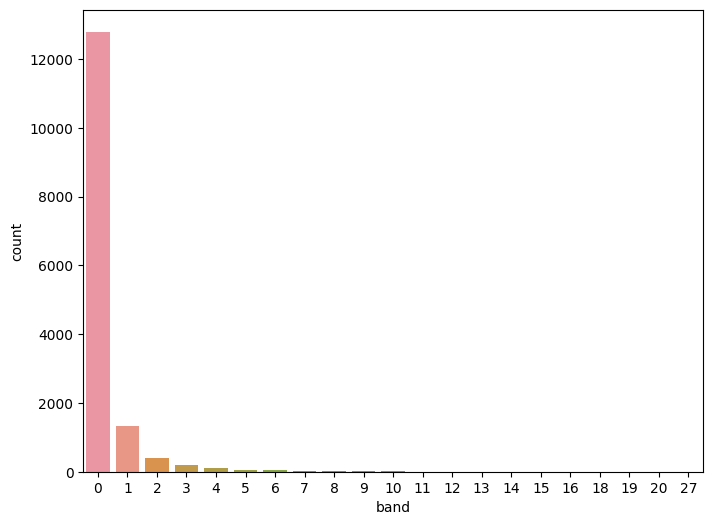

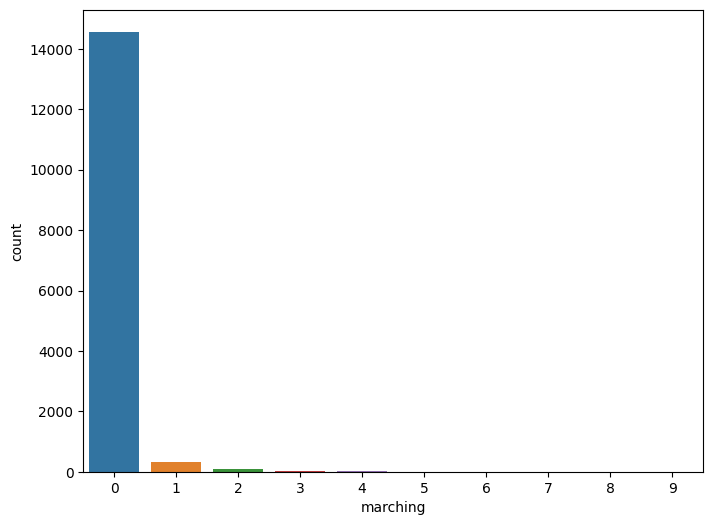

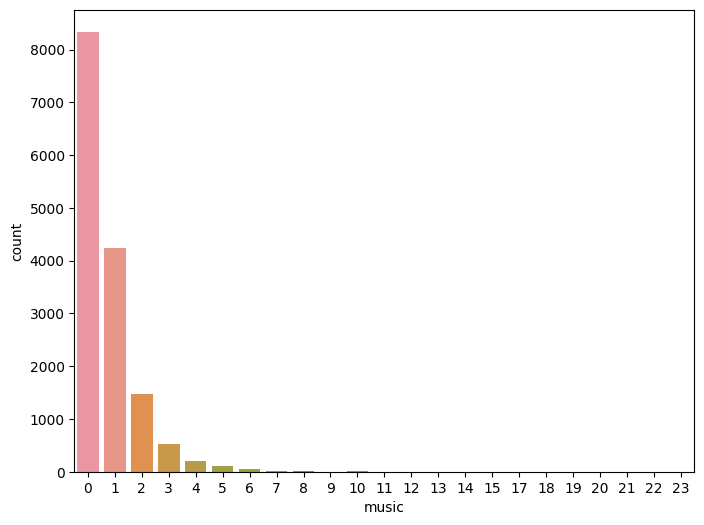

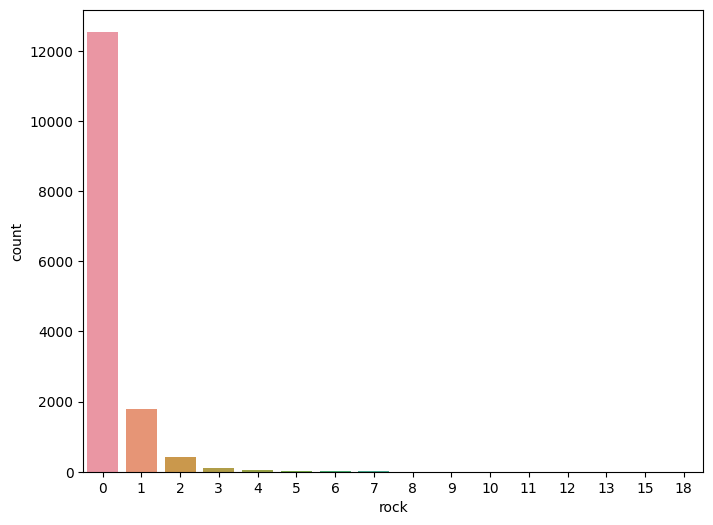

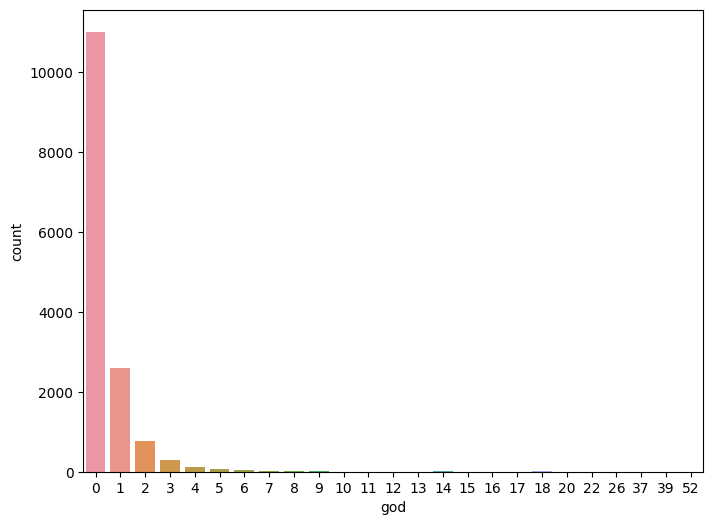

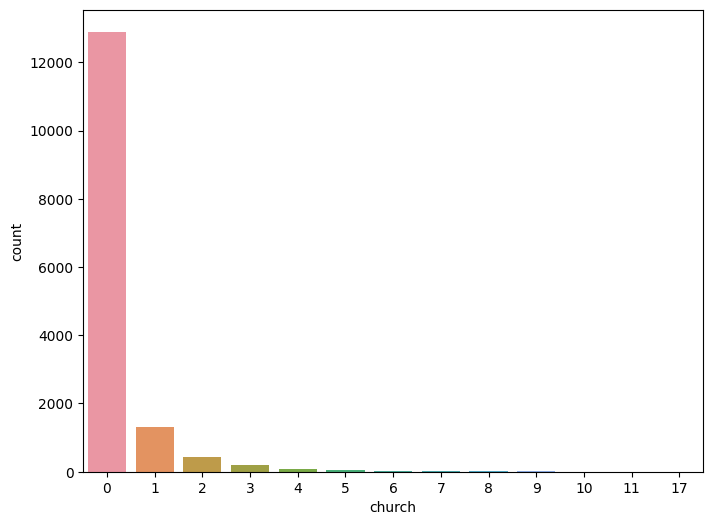

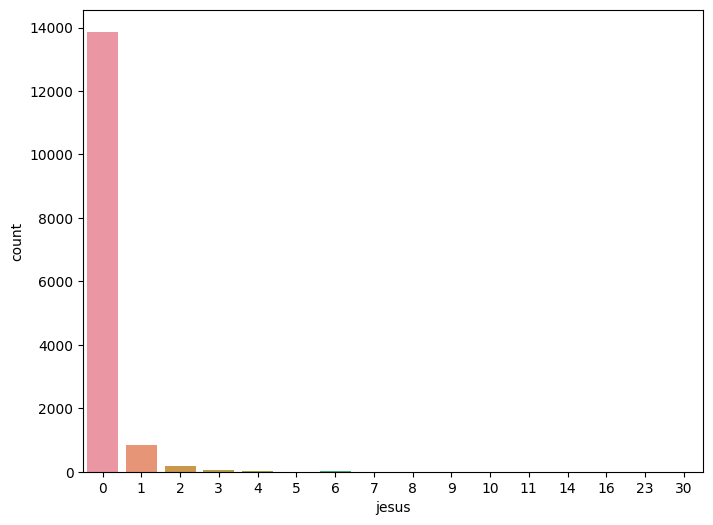

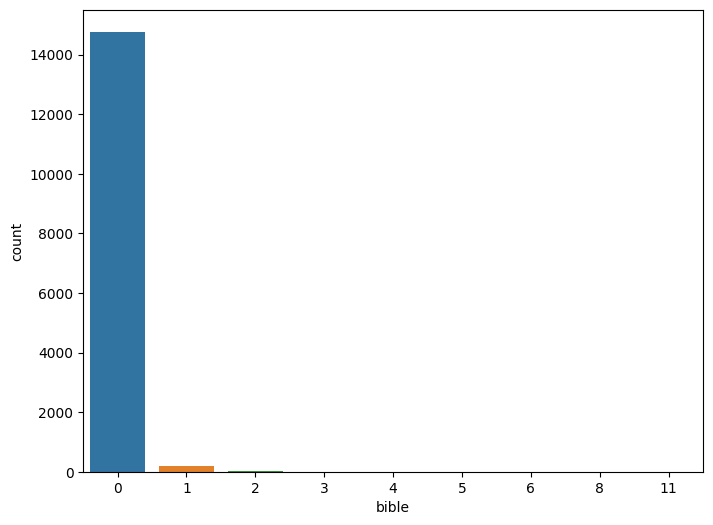

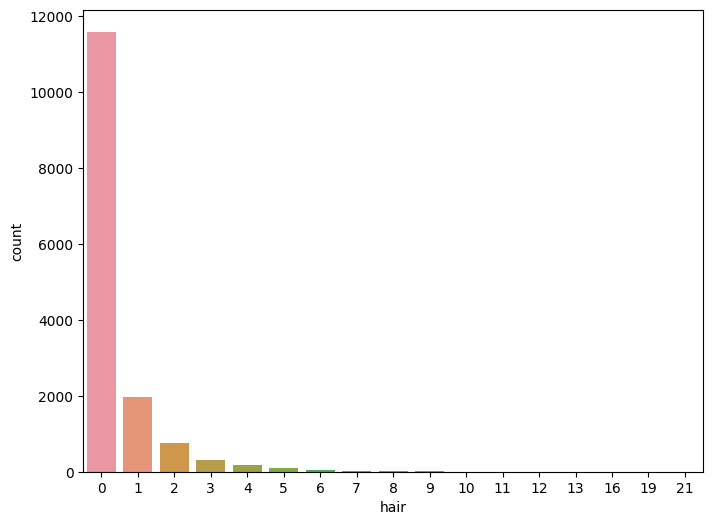

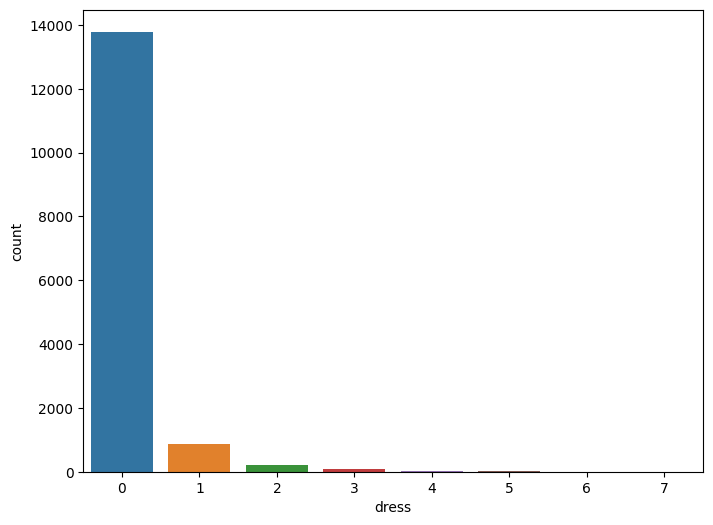

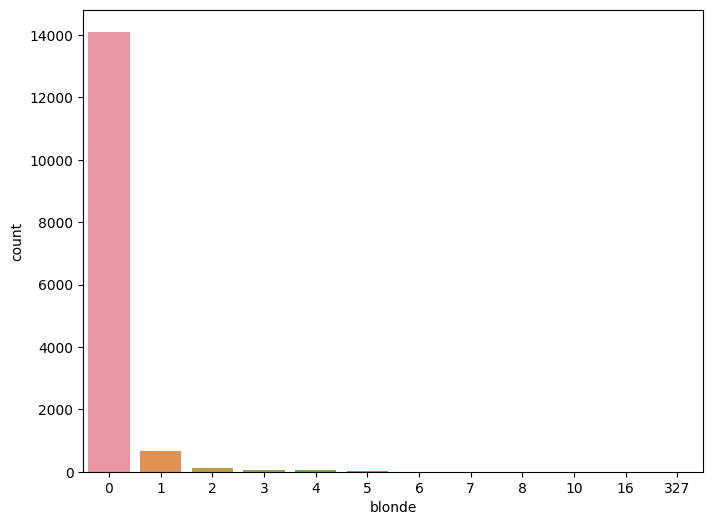

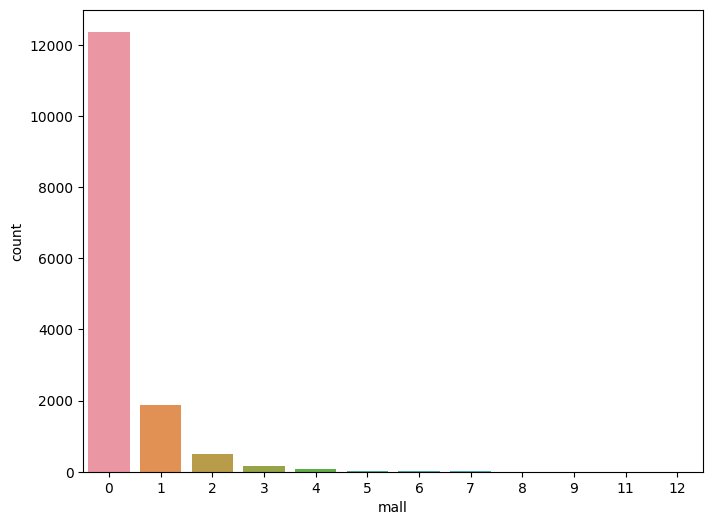

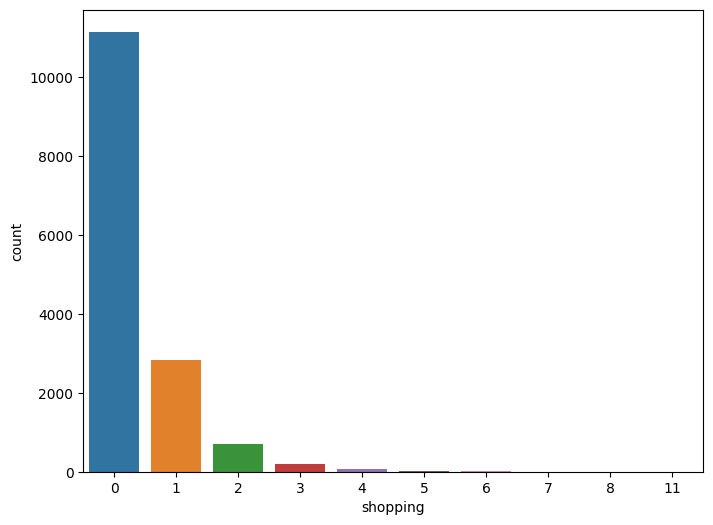

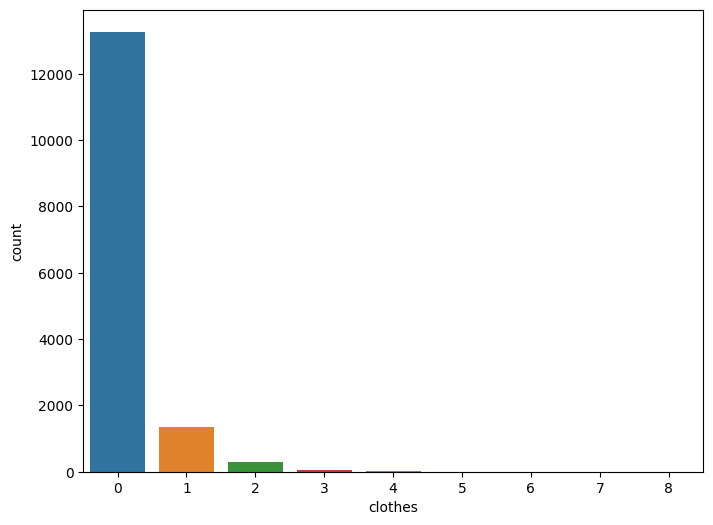

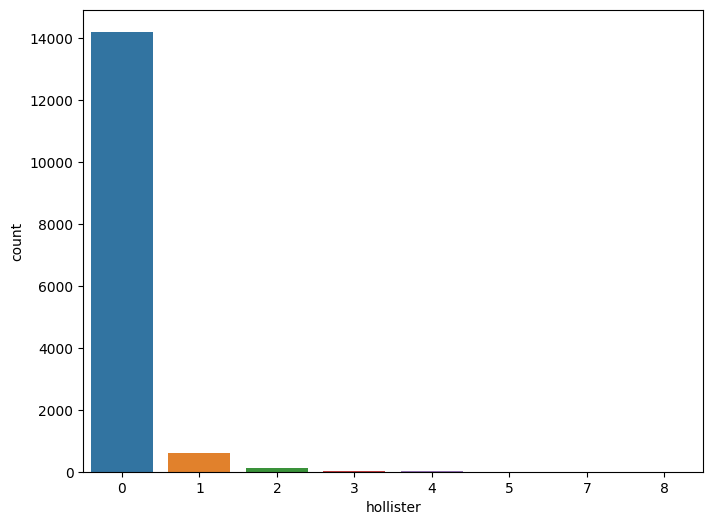

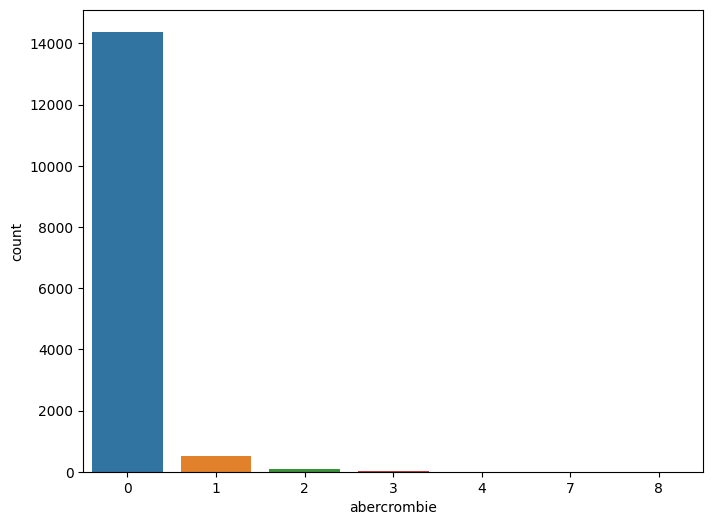

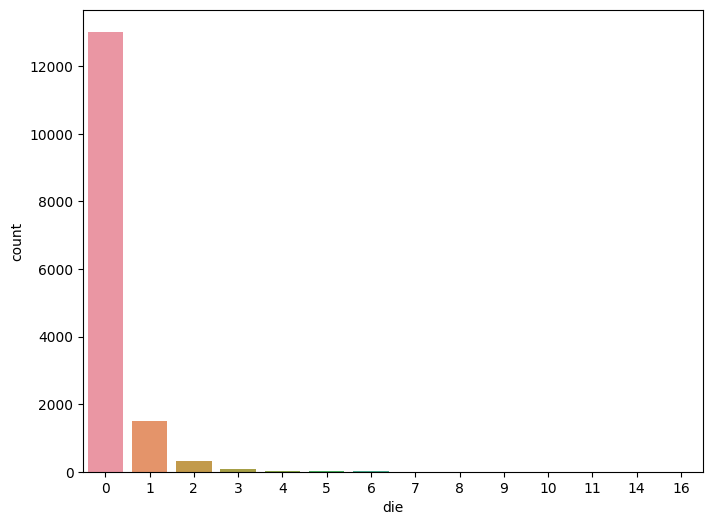

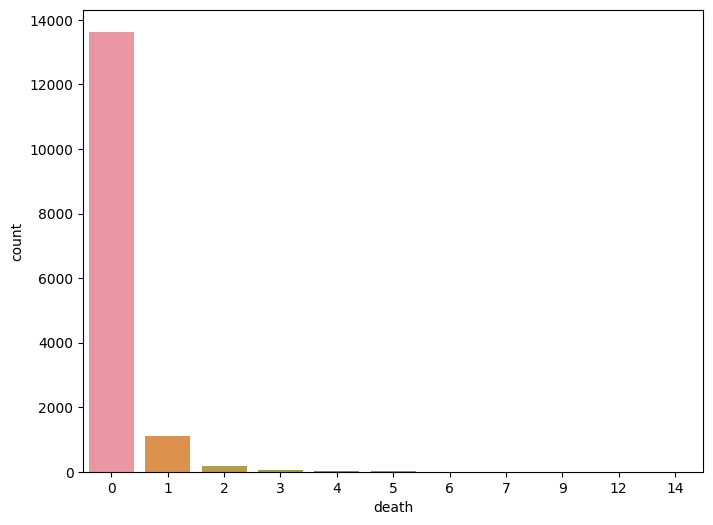

In [71]:
for i in [ 'gender', 'basketball',
       'football', 'soccer', 'softball', 'volleyball', 'swimming',
       'cheerleading', 'baseball', 'tennis', 'sports', 'cute', 'sex', 'sexy',
       'hot', 'kissed', 'dance', 'band', 'marching', 'music', 'rock', 'god',
       'church', 'jesus', 'bible', 'hair', 'dress', 'blonde', 'mall',
       'shopping', 'clothes', 'hollister', 'abercrombie', 'die', 'death']:
    plt.figure(figsize = (8,6))
    sn.countplot(x = i , data = data)
    

In [72]:
data.isnull().sum()

gradyear              0
gender             1337
age                2496
NumberOffriends       0
basketball            0
football              0
soccer                0
softball              0
volleyball            0
swimming              0
cheerleading          0
baseball              0
tennis                0
sports                0
cute                  0
sex                   0
sexy                  0
hot                   0
kissed                0
dance                 0
band                  0
marching              0
music                 0
rock                  0
god                   0
church                0
jesus                 0
bible                 0
hair                  0
dress                 0
blonde                0
mall                  0
shopping              0
clothes               0
hollister             0
abercrombie           0
die                   0
death                 0
drunk                 0
drugs                 0
dtype: int64

In [73]:
data.head()

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2007,NaN,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2007,F,17.41,49,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,2007,F,17.511,41,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
3,2006,F,NaN,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2008,F,16.657,1,0,0,0,0,0,1,...,0,0,0,3,0,0,0,0,0,0


In [74]:
data = data.dropna()

In [75]:
data.isnull().sum()

gradyear           0
gender             0
age                0
NumberOffriends    0
basketball         0
football           0
soccer             0
softball           0
volleyball         0
swimming           0
cheerleading       0
baseball           0
tennis             0
sports             0
cute               0
sex                0
sexy               0
hot                0
kissed             0
dance              0
band               0
marching           0
music              0
rock               0
god                0
church             0
jesus              0
bible              0
hair               0
dress              0
blonde             0
mall               0
shopping           0
clothes            0
hollister          0
abercrombie        0
die                0
death              0
drunk              0
drugs              0
dtype: int64

In [76]:
data.head()

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
1,2007,F,17.41,49,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,2007,F,17.511,41,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
4,2008,F,16.657,1,0,0,0,0,0,1,...,0,0,0,3,0,0,0,0,0,0
5,2008,M,18.034,32,0,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2006,M,18.53,18,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [77]:
data.duplicated().any()

True

In [78]:
data = data.drop(["gradyear"] , axis = 1)

In [79]:
data

,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
1,F,17.41,49,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,F,17.511,41,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
4,F,16.657,1,0,0,0,0,0,1,0,...,0,0,0,3,0,0,0,0,0,0
5,M,18.034,32,0,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,M,18.53,18,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,F,16.329,21,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,1,0,0
14996,F,16.545,50,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14997,F,17.999,32,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
14998,F,17.903,20,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/tmp/ipykernel_33/222380929.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data["NumberOffriends"] , color = "green")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='NumberOffriends', ylabel='Density'>

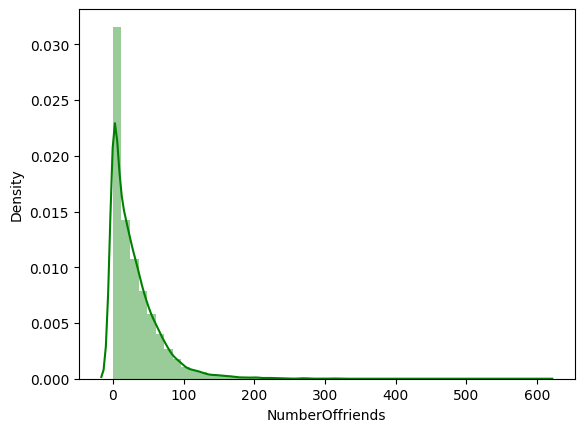

In [80]:
sn.distplot(data["NumberOffriends"] , color = "green")

In [81]:
from sklearn.preprocessing import StandardScaler , LabelEncoder
from scipy.cluster.hierarchy import linkage , dendrogram
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [82]:
data_age = data["gender"]

In [83]:
print(data_age)

1        F
2        F
4        F
5        M
6        M
        ..
14995    F
14996    F
14997    F
14998    F
14999    F
Name: gender, Length: 12042, dtype: object


In [84]:
data_age = pd.DataFrame(data_age)
print(data_age)

      gender
1          F
2          F
4          F
5          M
6          M
...      ...
14995      F
14996      F
14997      F
14998      F
14999      F

[12042 rows x 1 columns]


In [85]:
le = LabelEncoder()
data_age = data_age.apply(le.fit_transform)

In [86]:
data = data.drop(["gender"] , axis = 1)

In [87]:
data = pd.concat([data_age , data] , axis = 1)

In [88]:
data

,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
1,0,17.41,49,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,17.511,41,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
4,0,16.657,1,0,0,0,0,0,1,0,...,0,0,0,3,0,0,0,0,0,0
5,1,18.034,32,0,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,18.53,18,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0,16.329,21,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,1,0,0
14996,0,16.545,50,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14997,0,17.999,32,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
14998,0,17.903,20,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
data = data.drop(["age"] , axis = 1)

In [101]:
data

,gender,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
1,0,49,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,41,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,1
4,0,1,0,0,0,0,0,1,0,0,...,0,0,0,3,0,0,0,0,0,0
5,1,32,0,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,18,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0,21,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,1,0,0
14996,0,50,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
14997,0,32,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
14998,0,20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
from sklearn.decomposition import PCA

In [106]:
pca = PCA(n_components = 7)
x_pca = pca.fit_transform(data)

In [107]:
x_pca

array([[ 1.85045581e+01, -1.88971120e-01, -9.31324777e-01, ...,
         7.05497132e-01,  2.66449633e-02, -5.89286888e-02],
       [ 1.05110510e+01,  3.72881341e-01,  3.01565995e+00, ...,
         1.55323194e+00, -2.40907959e-01, -1.31730659e+00],
       [-2.94757289e+01,  2.82756819e-01,  3.08871784e+00, ...,
        -9.08473454e-01, -1.29686369e+00, -2.94479578e+00],
       ...,
       [ 1.50421142e+00, -2.26931330e-01, -1.14030437e+00, ...,
         3.87977266e-01, -1.50850609e-01, -1.59024015e-03],
       [-1.04971934e+01, -2.14048696e-01, -8.26477332e-01, ...,
         6.19492159e-02,  3.91429865e-01, -1.08353782e-01],
       [-5.48546831e+00, -1.24718174e-01,  1.25461041e+00, ...,
        -1.86158534e+00,  2.67304737e+00,  4.71405351e-01]])

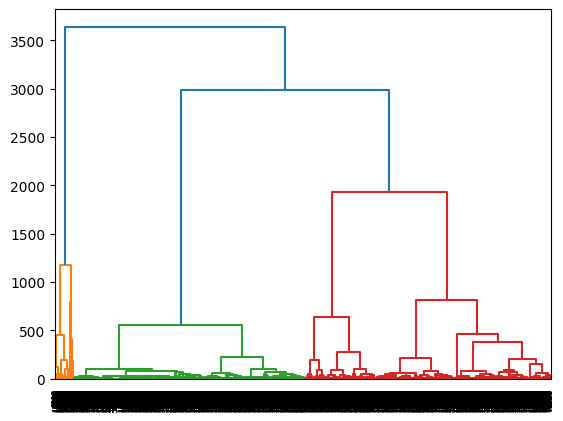

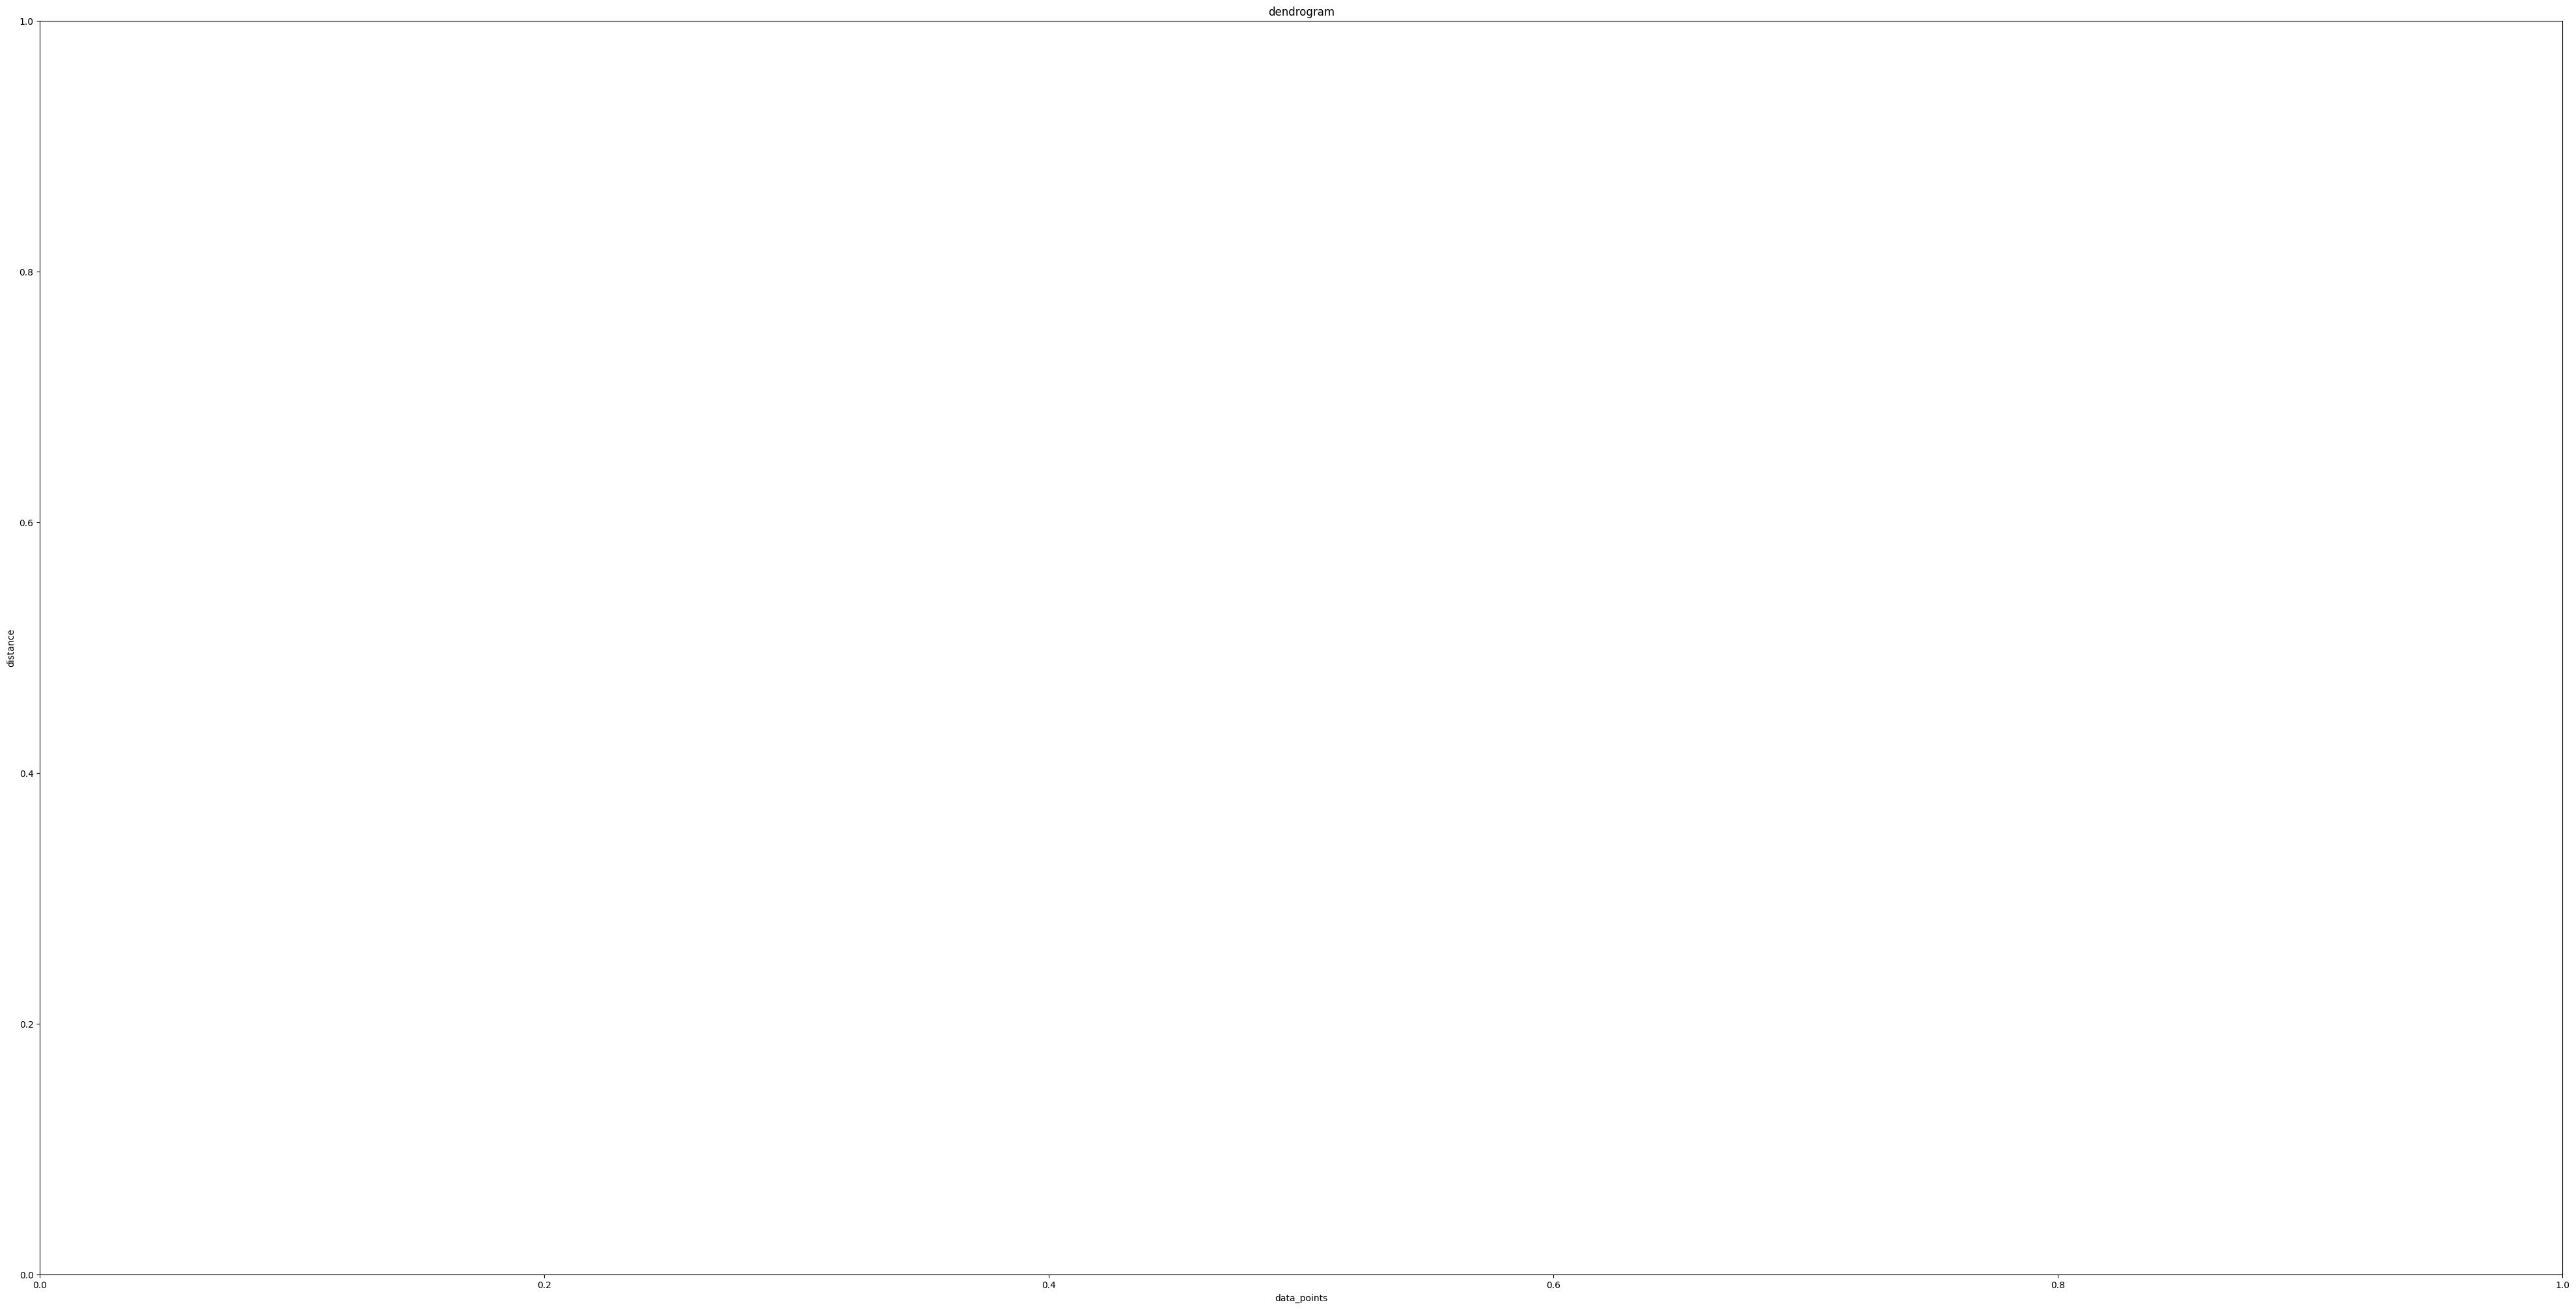

In [110]:
z = linkage(x_pca , method = "ward")
dendrogram(z)
plt.figure(figsize = (50,25))
plt.title("dendrogram")
plt.xlabel("data_points")
plt.ylabel("distance")
plt.show()

In [113]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k , init = "k-means++" , random_state = 42)
    kmeans.fit_transform(x_pca)
    wcss.append(kmeans.inertia_)
    wcss

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

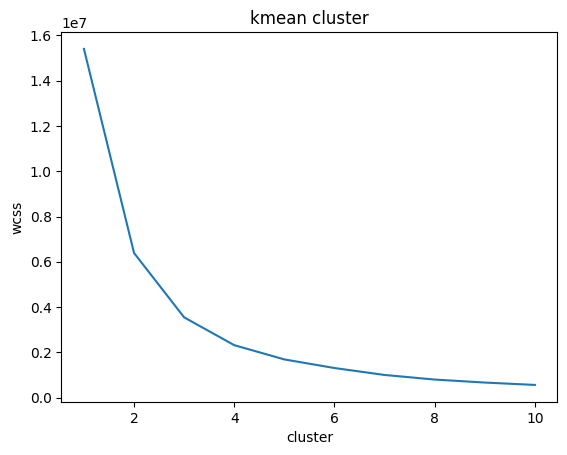

In [114]:
plt.plot(range(1,11) , wcss)
plt.title("kmean cluster")
plt.xlabel("cluster")
plt.ylabel("wcss")
plt.show()

In [118]:
from sklearn.cluster import DBSCAN

In [122]:
dbscan = DBSCAN(eps = 0.5 , min_samples = 7)
dbscan.fit(x_pca)
dbscan_label = dbscan.labels_

In [123]:
dbscan_label

array([69, -1, -1, ..., 30, 16, -1])

In [124]:
cluster = pd.DataFrame(dbscan.labels_ , columns = ["clusters"])

In [125]:
cluster

,clusters
0,69
1,-1
2,-1
3,-1
4,0
...,...
12037,68
12038,-1
12039,30
12040,16
